# p.20 연습
대출자들의 채무 상환과 관련된 데이터를 활용하여 상환 여부를 예측하기 위한 로지스틱 회귀분석을 실시하고 결과를 해석하시오.
* 목표변수 : BAD(범주형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

In [1]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# StandardScaler
from sklearn.preprocessing import StandardScaler
# 데이터 분리
from sklearn.model_selection import train_test_split
# LogisticRegression
from statsmodels.api import Logit
# 평가함수
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [3]:
df_raw = pd.read_csv('D:/Study/PoscoAcademy/2_bigdata/raw_data/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


# Step 2. 데이터 전처리

### 결측치 처리

In [4]:
# 결측치 확인
df_raw.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
# JOB 변수 결측치 Other 대체
df_raw['JOB'].fillna('Other', inplace = True)
# 숫자형 변수 결측치 평균 대체
df_raw.fillna(df_raw.mean(), inplace = True)

### 데이터 분리

In [6]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print('train data :', df_train.shape)
print('test data :', df_test.shape)

train data : (2623, 13)
test data : (1125, 13)


# Step 3. 모델 및 회귀계수 검토

### 로지스틱 회귀분석

In [8]:
log_model = Logit.from_formula('''BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC''',
                               df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                  0.2257
Time:                        16:23:54   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

# Step 4. 예측 및 성능 평가

### 예측

In [9]:
# train data 예측
y_pred_train = log_result.predict(df_train)
# 0과 1의 값을 가진 class로 변환
y_pred_train_class = (y_pred_train > 0.5).astype(int)
print('Train 예측 결과\n', y_pred_train_class.head(),'\n')
print('Confusion Matrix :\n{}'.format(confusion_matrix(df_train['BAD'], y_pred_train_class)),'\n')
# test data 예측
y_pred_test = log_result.predict(df_test)
# 0과 1의 값을 가진 class로 변환
y_pred_test_class = (y_pred_test > 0.5).astype(int)
print('Test 예측 결과\n', y_pred_test_class.head(),'\n')
print('Confusion Matrix :\n{}'.format(confusion_matrix(df_test['BAD'], y_pred_test_class)),'\n')
# test data 예측 - 임계값 변경
y_pred_test_class = (y_pred_test > 0.6).astype(int)
print('Test 예측 결과 - 임계값 변경\n', y_pred_test_class[10:15].head(),'\n')
print('Confusion Matrix :\n{}'.format(confusion_matrix(df_test['BAD'], y_pred_test_class)),'\n')

Train 예측 결과
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int32 

Confusion Matrix :
[[2365   17]
 [ 190   51]] 

Test 예측 결과
 1721    0
822     0
1686    0
789     0
165     0
dtype: int32 

Confusion Matrix :
[[1017    4]
 [  81   23]] 

Test 예측 결과 - 임계값 변경
 2459    0
2293    0
1433    0
2314    0
281     0
dtype: int32 

Confusion Matrix :
[[1018    3]
 [  83   21]] 



### 평가

In [10]:
# 실제 train data 와 예측 결과 비교
print('Train data 예측/분류 결과')
print('Accuracy : {0:.3f}\n'.format(accuracy_score(df_train['BAD'], y_pred_train_class)),'\n')
print('Confusion Matrix :\n{}'.format(confusion_matrix(df_train['BAD'], y_pred_train_class)),'\n')
print(classification_report(df_train['BAD'], y_pred_train_class, digits = 3))
# 실제 test data 와 예측 결과 비교
print('Test data 예측/분류 결과')
print('Accuracy : {0:.3f}\n'.format(accuracy_score(df_test['BAD'], y_pred_test_class)),'\n')
print('Confusion Matrix :\n{}'.format(confusion_matrix(df_test['BAD'], y_pred_test_class)),'\n')
print(classification_report(df_test['BAD'], y_pred_test_class, digits = 3))

Train data 예측/분류 결과
Accuracy : 0.921
 

Confusion Matrix :
[[2365   17]
 [ 190   51]] 

              precision    recall  f1-score   support

           0      0.926     0.993     0.958      2382
           1      0.750     0.212     0.330       241

    accuracy                          0.921      2623
   macro avg      0.838     0.602     0.644      2623
weighted avg      0.909     0.921     0.900      2623

Test data 예측/분류 결과
Accuracy : 0.924
 

Confusion Matrix :
[[1018    3]
 [  83   21]] 

              precision    recall  f1-score   support

           0      0.925     0.997     0.959      1021
           1      0.875     0.202     0.328       104

    accuracy                          0.924      1125
   macro avg      0.900     0.599     0.644      1125
weighted avg      0.920     0.924     0.901      1125



# Step 5. 결론

### 설명변수 중요도

<AxesSubplot:>

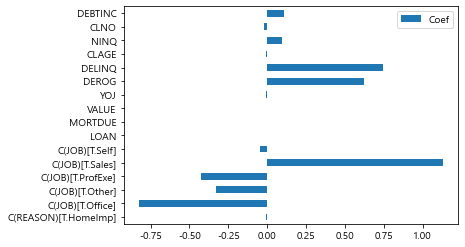

In [11]:
df_logistic_coef = pd.DataFrame({'Coef' : log_result.params.values[1:]},
                                index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

* 직업이 sales 이거나, 연체된 신용 한도의 수(DELINQ)와 심각한 연체 수(DEROG)가 높을 경우 대출 채무 불이행(BAD)일 가능성이 높다.
* 직업이 office 이면 대출채무 불이행(BAD)일 가능성이 낮다.

### 표준화 회귀 계수

In [12]:
# select_dtypes : 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')
# data scaling
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)
# char + numeric
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
# BAD 값을 0과 1로 변환
df_scaled['BAD'] = np.where(df_scaled['BAD'] > 0, 1, 0)
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                                   test_size = 0.3,
                                                   random_state = 1234)

### 표준화 회귀 계수 모델

In [13]:
scaled_log_model = Logit.from_formula('''BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC''',
                                      df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 02 Jan 2023   Pseudo R-squ.:                  0.2257
Time:                        16:27:58   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

### 표준화 회귀 계수 모델 설명변수 중요도

<AxesSubplot:>

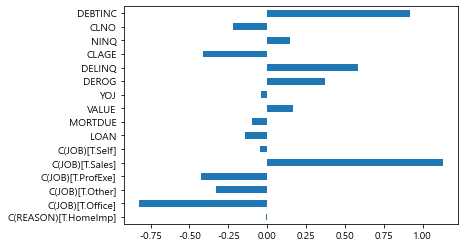

In [14]:
df_log_scaled_coef = pd.DataFrame({'Coef' : scaled_log_result.params.values[1:]},
                                  index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = 'Coef', legend = False)

* 직업이 Sales 이거나 부채비율(DEBTINC)과 연체 된 신용 한도의 수(DELINQ)가 높을 경우 대출 채무 불이행(BAD)일 가능성이 높다.
* 특히 부채비율(DEBTINC)의 영향이 커진다.
* 직업이 office인 경우 대출 채무 불이행(BAD)일 가능성이 낮다.